In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.special import erfc
from IPython.display import Latex, Math

import warnings
warnings.filterwarnings('ignore')

In [2]:
print("A quick example: You can change the provided value\n")

print("Let us find advective mass rate exiting a column.\n\nProvided are:")

R_1 = 0.25 # cm, radius of the column
ne_1 = 0.3 # (), effective porosity
v_1 = 0.02 # cm/s, velocity
C_1   = 2 # mg/L, concentration

# intermediate calculation
A_1 = np.pi*R_1**2 # Column surface area
Q_1 = ne_1*A_1*v_1 # cm^3/s, discharge

#solution
J_adv = Q_1*C_1

print("Radius = {} cm\nWater flow rate = {} cm/s\nInput concentration = {} mg/L and\nEffective porosity = {:02.2f}".format(R_1, v_1, C_1, ne_1), "\n")
print("The resulting advective mass flow rate is {:02.4f} mg/s".format(J_adv))


A quick example: You can change the provided value

Let us find advective mass rate exiting a column.

Provided are:
Radius = 0.25 cm
Water flow rate = 0.02 cm/s
Input concentration = 2 mg/L and
Effective porosity = 0.30 

The resulting advective mass flow rate is 0.0024 mg/s



Simulating advective flow



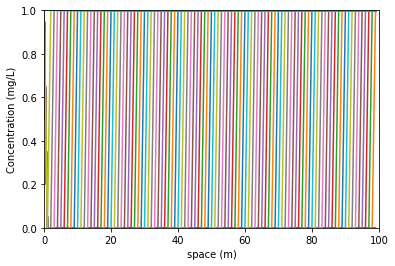

In [3]:
# simulating advection 1D

print("\nSimulating advective flow\n")

import numpy as np
import matplotlib.pyplot as plt

N= 100 # number of cell - i.e. compartment a column is divided into
c0 = 0 # initial concentration
cin = 1 # input concentration
c1 = c0*np.ones((1,N)) # initializing - i.e., all compartment has zero conc.

for i in range(1, N+1): # number of time steps- we make it equivalent to cell number.
    c1 = np.roll(c1, N-1) # "roll" is numpy function for shifting
    c1[0,0] = cin # make the first cell = cin again. This is because np.roll uses the last value as the first one.
    
    plt.plot(c1.T)
    plt.xlabel("space (m)"); plt.ylabel("Concentration (mg/L)")
    plt.xlim([0,N]); plt.ylim([0,cin])

In [4]:
print("A quick example: You can change the provided values\n")

print("Let us find dispersive mass rate exiting a column.\n\nProvided are:")

L_2  = 50 # cm, length of the pipe
R_2  = 0.25 # cm, radius of the column
ne_2 = 0.3 # (), effective porosity
v_2  = 0.02 # cm/s, velocity
Ci_2 = 10 # mg/L, inlet concentration
Co_2 = 2 # mg/L, outlet concentration
a_2  = 1 # cm, dispersivity

# intermediate calculation
A_2 = np.pi*R_2**2 # Column surface area
Cg_2 = (Ci_2-Co_2)/L_2 # mg/L-cm, concentration gradient

#solution
Jm_dis = ne_2*A_2*a_2*v_2*Cg_2



print("Length of column = {} cm\nRadius of column = {} cm\nWater flow rate = {} cm/s\nInlet concentration = {} mg/L\nOutlet concentration = {} mg/L \
\nEffective porosity = {:02.2f}\nDispersivity = {}".format(L_2,R_2, v_2, Ci_2, Co_2,ne_2, a_2), "\n")

print("The resulting dispersive mass flow is {:02.4f} mg/s".format(Jm_dis))


A quick example: You can change the provided values

Let us find dispersive mass rate exiting a column.

Provided are:
Length of column = 50 cm
Radius of column = 0.25 cm
Water flow rate = 0.02 cm/s
Inlet concentration = 10 mg/L
Outlet concentration = 2 mg/L 
Effective porosity = 0.30
Dispersivity = 1 

The resulting dispersive mass flow is 0.0002 mg/s



Simulating mechanical dispersion
You can change input values to see the effect


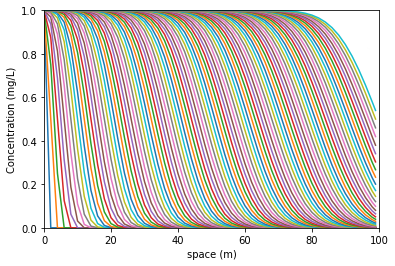

In [5]:
#Simulating mechanical dispersion

print("\nSimulating mechanical dispersion\nYou can change input values to see the effect" )

N = 100
c0 = 0
cin = 1
Neumann = 0.5; # Neumann number ensures that transport is combination of adv and disp.
c1 = c0*np.ones((1,N))
c2 = c0*np.zeros((1,N))
c=c1

for i in range(1, N+1):
    
    #dispersion component using Neumann number (D. Dt/Dx² -D= Delta )
    for i in range(2,N):
        c2[0,i-1] = c1[0,i-1] + Neumann*(c1[0,i-2]-2*c1[0,i-1]+c1[0,i]); # FD stensil for d²C/dx²
           
    c2[0,0] = c1[0,0] + Neumann*(cin - 2*c1[0,0]+c1[0,1]); # the first cell value
    c2[0,N-1] = c1[0,N-1] + Neumann*(c1[0,N-2] - c1[0,N-1]); # the lass cell value
    c1 =c2;
    
    #shifting cell - advection component
    c1 = np.roll(c1, N+1);  
    c1[0,0] = cin;
    
    plt.plot(c1.T);
    plt.xlabel("space (m)"); plt.ylabel("Concentration (mg/L)")
    plt.xlim([0,N]); plt.ylim([0,cin])



Simulating diffusion 
You can change input values to see the effect



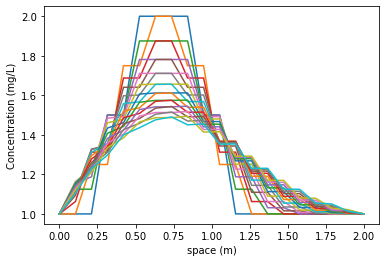

In [6]:
print("\nSimulating diffusion \nYou can change input values to see the effect\n" ) 
# Initial Conditions
nx = 20
dx = 2 / (nx - 1) # number of space compartment
nt = 20    #the number of timesteps we want to calculate
Neumann = 0.5 # [ ], Neumann number = D. Dt/Dx² -D= Delta

u = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

# Calculation
un = np.ones(nx) #our placeholder array, un, to advance the solution in time
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx - 1):
        u[i] = un[i] + Neumann * (un[i+1] - 2 * un[i] + un[i-1])
        
    plt.plot(np.linspace(0, 2, nx), u);
    plt.xlabel("space (m)"); plt.ylabel("Concentration (mg/L)");

In [7]:
print("A quick example: You can change the provided values\n")

print("Let us find diffusive mass rate exiting a column.\n\nProvided are:")

L_3  = 50 # cm, length of the columns
R_3  = 0.25 # cm, radius of the column
Ci_3 = 10 # mg/L, inlet concentration
Co_3 = 2 # mg/L, outlet concentration
D_3  = 10**-5 # cm^2/s, dispersivity

# intermediate calculation
A_3 = np.pi*R_3**2 # Column surface area
Cg_3 = (Ci_3-Co_3)/L_3 # mg/L-cm, concentration gradient

#solution
Jm_diff = A_3*D_3*Cg_3


print("Radius = {} cm\nLength of the column = {} cm/s\nInlet concentration = {} mg/L\nOutlet concentration = {} mg/L \
\nDiffusion Coefficient = {}".format(R_3, L_3, Ci_3, Co_3, D_3), "\n")

print("The resulting dispersive mass flux is {:02.7f} mg/s".format(Jm_diff))

A quick example: You can change the provided values

Let us find diffusive mass rate exiting a column.

Provided are:
Radius = 0.25 cm
Length of the column = 50 cm/s
Inlet concentration = 10 mg/L
Outlet concentration = 2 mg/L 
Diffusion Coefficient = 1e-05 

The resulting dispersive mass flux is 0.0000003 mg/s


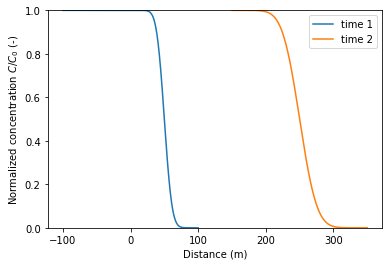

In [8]:
# simulating Ogata and Banks (1961) for evaluation dominant front.

x = np.linspace(-100, 100, 1000)
C0 = 10
Dx = 4
v = 5# change v and t together  to observe the dominant front.
t = 10 # 


C = 0.5*C0*erfc((x-v*t)/(2*np.sqrt(Dx*t))) 
plt.plot(x, C/C0)

t2 = t*5
x1 = x + v*t2
C1 = 0.5*C0*erfc((x1-v*t2)/(2*np.sqrt(Dx*t2))) 
plt.plot(x1, C1/C0)
plt.ylim((0, 1))
plt.ylabel(r"Normalized concentration $C/C_0$ (-)" )
plt.xlabel("Distance (m)");
plt.legend(["time 1", "time 2"]);

In [9]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all" 

Latex("A quick example to present the relative importance of different mass flow in the transport of solute \n")

A  =  1 # m², =ne.A,  cross-sectional area, with ne= eff. porosity
v  =  1 # m/d, linear velocity
C  =  1 # mg/L = 1 g/m^3, concentration
D  =  1 # m, transport disntance
gr =  1 # g/m⁴, Delta C/L, conc. gradient
Al =  0.1 # m, dispersivity
Dp =  10**-5 # m²/d, pore diff. coefficient

# computation
Jadv = A*v*C
Jdisp = A*Al*v*gr
Jdiff = A*Dp*gr


from IPython.display import Latex
Latex(r"""\begin{eqnarray}
J_{adv} & = n_e\cdot A \cdot v \cdot C \\
J_{dis} & = n_e\cdot A \cdot \alpha  \cdot  v \cdot \frac{\Delta C}{L}  \\
J_{diff} & = n_e\cdot A \cdot D_p  \cdot \frac{\Delta C}{L} 
\end{eqnarray}""")


#output
print("\n The contribution of advective flow is: {0:0.2f}".format(Jadv), "g/d \n")
print("The contribution of dispersive flow is: {0:0.2f}".format(Jdisp), "g/d \n")
print("The contribution of diffusive flow is: {0:0.1e}".format(Jdiff), "g/d \n")



 The contribution of advective flow is: 1.00 g/d 

The contribution of dispersive flow is: 0.10 g/d 

The contribution of diffusive flow is: 1.0e-05 g/d 



An example code for obtaining concentration profile 



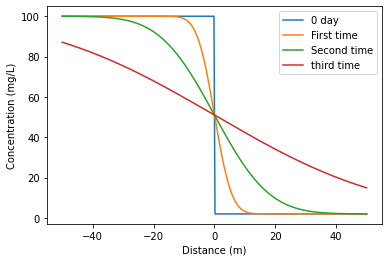

In [10]:
print("An example code for obtaining concentration profile \n")

# Input        
Cb = 100 # mg/L  # 
Ca = 2 # mg/L  
D = 1 # m²/d  
x = np.linspace(-50, 50, 300)
t = [0, 10, 100, 1000] # change time as you like - limit to four

# dont change anything from here

def f1(t): 
    for i in t:
        A = 2*np.sqrt(D*i)
        C = Ca + (Cb-Ca)/2 * erfc(x/A)
        
        plt.plot(x, C)
        label = ["0 day", "First time", "Second time", "third time"]
        plt.legend(label); 
        plt.ylabel("Concentration (mg/L)"); plt.xlabel("Distance (m)")

f1(t) # evaluate


An example code for obtaining Breakthrough curve 



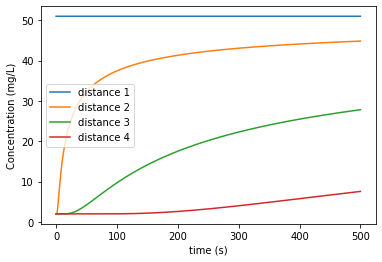

In [11]:
print("An example code for obtaining Breakthrough curve \n")

def f1(x): # dont change anything from here
    for i in X:
        A = 2*np.sqrt(D*t)
        C = Ca + (Cb-Ca)/2 * erfc(i/A) # Crank (1975) modified
        
        plt.plot(t, C)
        label = ["distance 1", "distance 2", "distance 3", "distance 4"]
        plt.legend(label); 
        plt.ylabel("Concentration (mg/L)"); plt.xlabel("time (s)")


# Input        
Cb = 100 # mg/L  # 
Ca = 2# mg/L  
D = 1 # m²/d  
t = np.linspace(0, 500, 5000)
X = [0, 5, 20, 50] # 0 = advective, change other numbers

f1(X) # evaluate

In [12]:
from jupyterquiz import display_quiz
import json
with open("L8Q.json", "r") as file:
    questions=json.load(file)
    
display_quiz(questions)

<IPython.core.display.Javascript object>